In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

from my_files import get_metadata

In [2]:
# generate list of file paths for xml metadata
xml_directory = os.path.join('data', 'xml')
xml_files = os.listdir(xml_directory)
xml_files = [os.path.join(xml_directory, file) for file in xml_files]

In [3]:
df = pd.DataFrame([get_metadata(file) for file in tqdm(xml_files)])

100%|██████████| 16842/16842 [00:16<00:00, 1009.47it/s]


### explore metadata to check for errors

In [4]:
df.year = df.year.astype(int)

In [5]:
# check for duplicate jstor-ids:
df['jstor-id'].duplicated().sum()

0

In [6]:
df['jstor-id'].isnull().sum()

0

> All rows have a unique, non-null jstor-id

In [7]:
# check for duplicate pub-doi-ids
df['pub-doi-id'].duplicated().sum()

14659

In [8]:
# check for null pub-doi-ids
df['pub-doi-id'].isnull().sum()

14648

In [16]:
# some doi-ids are duplicated - investigate
doi_notnulls = df[df['pub-doi-id'].notnull()]
duplicated_dois = doi_notnulls[doi_notnulls['pub-doi-id'].duplicated(keep=False)]
duplicated_dois.sort_values('pub-doi-id')[['pub-doi-id', 'title']]

,pub-doi-id,title
3063,10.1098/rspb.2004.2995,Errata: Genetic Variation for an Aphid Wing Po...
3080,10.1098/rspb.2004.2995,Genetic Variation for an Aphid Wing Polyphenis...
2868,10.1098/rspb.2005.3090,Supply-Side Invasion Ecology: Characterizing P...
3064,10.1098/rspb.2005.3090,Errata: Supply-Side Invasion Ecology: Characte...
3015,10.1098/rspb.2005.3243,Cattle Domestication in the Near East Was Foll...
3065,10.1098/rspb.2005.3243,Errata: Cattle Domestication in the near East ...
913,10.1098/rspb.2006.3652,Editorial
943,10.1098/rspb.2006.3652,Crossing the Impassable: Genetic Connections i...
1713,10.1098/rspb.2008.0003,The Early Evolution of Feathers: Fossil Eviden...
3510,10.1098/rspb.2008.0003,Reversal of Evolutionary Downsizing Caused by ...


Some duplicated doi's are because the article has an errata. In other cases the same doi is attached to two completely different articles.

In [17]:
# # save as .csv
# df.to_csv('data/metadata.csv.gz', index=False, sep='\t', compression='gzip')

## Metadata exploration

In [18]:
# are there missing (or empty-string) values?
(df == '').sum()

filename          0
jstor-id          0
title             0
authors        1973
year              0
month             0
volume            0
issue           200
pages           802
keywords      11988
abstract          0
pub-doi-id        0
dtype: int64

In [19]:
df[df.authors == ''].title.value_counts()

Front Matter                                                                                                                                                                        690
Back Matter                                                                                                                                                                         686
Volume Information                                                                                                                                                                  345
Obituary Notices of Fellows Deceased                                                                                                                                                 25
Obituary Notices                                                                                                                                                                      4
                                                                                

In [20]:
# check remaining null values
df.isnull().sum()

filename          0
jstor-id          0
title             0
authors           0
year              0
month             0
volume            0
issue             0
pages             0
keywords          0
abstract       4795
pub-doi-id    14648
dtype: int64

Text(0, 0.5, 'Number of papers')

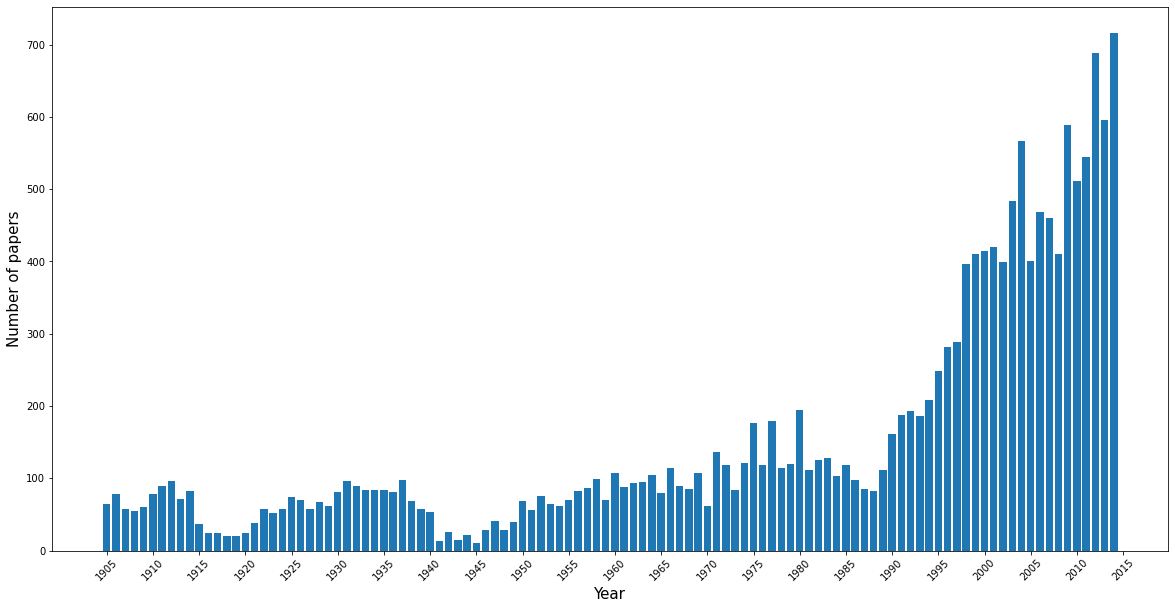

In [21]:
# What years were the paper published?
years = df.year.value_counts().sort_index()
plt.figure(figsize=(20,10))
plt.bar(years.index, years.values)
plt.xticks(np.arange(1905, 2016, 5), rotation=45)
plt.xlabel('Year', size=15)
plt.ylabel('Number of papers', size=15)